Question: Do public school students and private school students in BC receive the same final scores in all courses? 

Null hypothesis: There is no difference in the average final scores between public school students and private school students. 

Alternative hypothesis: Independent (private) school students receive higher average final scores than public school students in BC. 

In [1]:
library(tidyverse)
library(infer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘infer’ was built under R version 4.0.2”


In [2]:
exam <- read_csv("provincial-required-examinations-2016_2017_to_2019_2020.csv") 
head(exam)

Parsed with column specification:
cols(
  .default = col_character(),
  SCHOOL_NUMBER = col_logical(),
  SCHOOL_NAME = col_logical(),
  GRADE = col_double()
)

See spec(...) for full column specifications.

Warning message:
“81714 parsing failures.
 row           col           expected                actual                                                          file
2314 SCHOOL_NUMBER 1/0/T/F/TRUE/FALSE 00502001              'provincial-required-examinations-2016_2017_to_2019_2020.csv'
2314 SCHOOL_NAME   1/0/T/F/TRUE/FALSE Mount Baker Secondary 'provincial-required-examinations-2016_2017_to_2019_2020.csv'
2315 SCHOOL_NUMBER 1/0/T/F/TRUE/FALSE 00502001              'provincial-required-examinations-2016_2017_to_2019_2020.csv'
2315 SCHOOL_NAME   1/0/T/F/TRUE/FALSE Mount Baker Secondary 'provincial-required-examinations-2016_2017_to_2019_2020.csv'
2316 SCHOOL_NUMBER 1/0/T/F/TRUE/FALSE 00502001              'provincial-required-examinations-2016_2017_to_2019_2020.csv'
.... ............. 

SCHOOL_YEAR,DATA_LEVEL,PUBLIC_OR_INDEPENDENT,DISTRICT_NUMBER,DISTRICT_NAME,SCHOOL_NUMBER,SCHOOL_NAME,FACILITY_TYPE,SUBJECT_CATEGORY,EXAM_SUBJECT,⋯,NUMBER_OF_B,PERCENT_OF_B,NUMBER_OF_C_PLUS,PERCENT_OF_C_PLUS,NUMBER_OF_C,PERCENT_OF_C,NUMBER_OF_C_MINUS,PERCENT_OF_C_MINUS,NUMBER_OF_F,PERCENT_OF_F
<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2016/2017,Province Level,Province-Total,NA,NA,NA,NA,All Facility Types,ENGLISH,ENGLISH 12 FIRST PEOPLES,⋯,76,18,Msk,Msk,64,15,74,17,126,29
2016/2017,Province Level,Province-Total,NA,NA,NA,NA,All Facility Types,ENGLISH,ENGLISH 12 FIRST PEOPLES,⋯,112,26,77,18,91,21,89,21,Msk,Msk
2016/2017,Province Level,Province-Total,NA,NA,NA,NA,All Facility Types,ENGLISH,ENGLISH 12 FIRST PEOPLES,⋯,150,35,71,17,67,16,43,10,13,3
2016/2017,Province Level,Province-Total,NA,NA,NA,NA,All Facility Types,ENGLISH,ENGLISH 12 FIRST PEOPLES,⋯,34,17,35,18,43,22,61,31,Msk,Msk
2016/2017,Province Level,Province-Total,NA,NA,NA,NA,All Facility Types,ENGLISH,ENGLISH 12 FIRST PEOPLES,⋯,Msk,Msk,25,13,30,15,37,19,84,42
2016/2017,Province Level,Province-Total,NA,NA,NA,NA,All Facility Types,ENGLISH,ENGLISH 12 FIRST PEOPLES,⋯,55,28,37,19,36,18,Msk,Msk,Msk,Msk


In [3]:
exam_select <- exam %>%
    select(PUBLIC_OR_INDEPENDENT, EXAM_SUBJECT, MARK_TYPE, AVERAGE_PERCENT) %>%
    filter(AVERAGE_PERCENT != "Msk") %>% 
    filter(PUBLIC_OR_INDEPENDENT == "BC Public School" | PUBLIC_OR_INDEPENDENT == "BC Independent School") %>% 
    filter(MARK_TYPE == "Final Marks") %>%
    mutate(AVERAGE_PERCENT = as.numeric(AVERAGE_PERCENT))

head(exam_select)

PUBLIC_OR_INDEPENDENT,EXAM_SUBJECT,MARK_TYPE,AVERAGE_PERCENT
<chr>,<chr>,<chr>,<dbl>
BC Public School,ENGLISH 12 FIRST PEOPLES,Final Marks,68.4
BC Public School,ENGLISH 12 FIRST PEOPLES,Final Marks,64.2
BC Public School,ENGLISH 12 FIRST PEOPLES,Final Marks,71.3
BC Public School,ENGLISH 12 FIRST PEOPLES,Final Marks,64.7
BC Public School,ENGLISH 12 FIRST PEOPLES,Final Marks,69.1
BC Public School,COMMUNICATIONS 12,Final Marks,67.7


Exploratory data analysis:

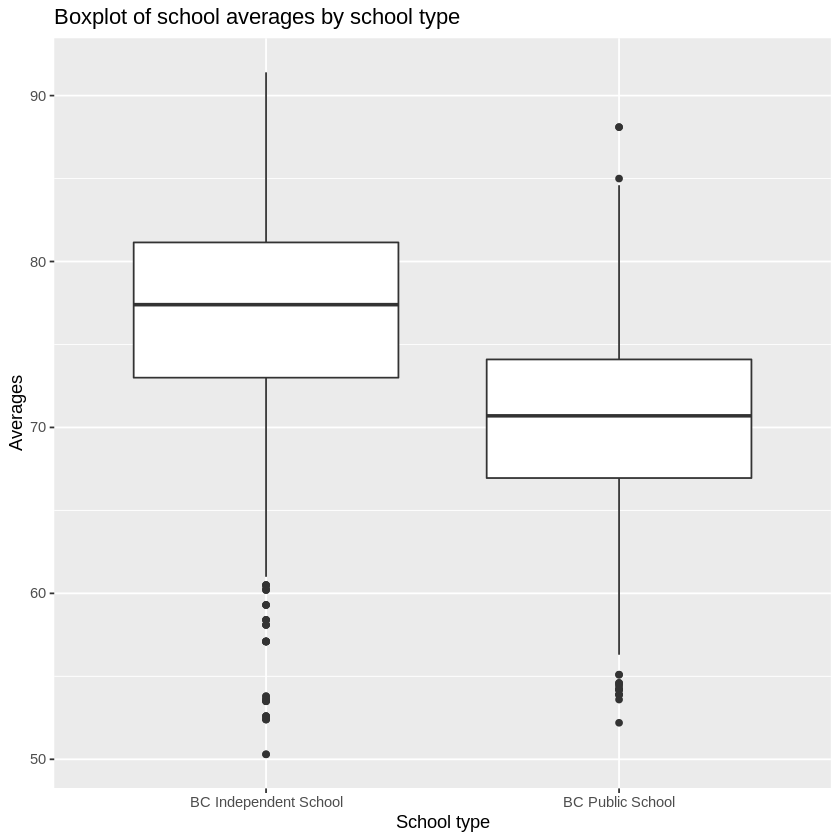

In [4]:
exam_boxplot <- exam_select %>%
    ggplot() +
    geom_boxplot(aes(x = PUBLIC_OR_INDEPENDENT, y = AVERAGE_PERCENT)) +
    ggtitle("Boxplot of school averages by school type") + 
    xlab("School type") + 
    ylab("Averages")

exam_boxplot

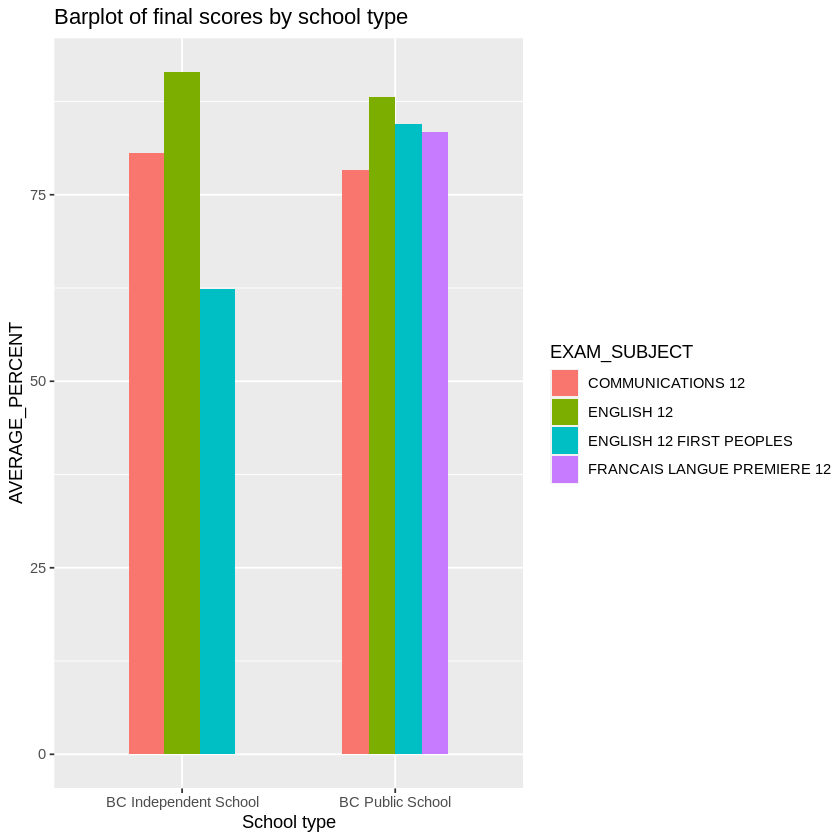

In [11]:
exam_barplot <- exam_select %>%
    ggplot(aes(x = PUBLIC_OR_INDEPENDENT, y = AVERAGE_PERCENT, fill = EXAM_SUBJECT)) +
    geom_bar(stat="identity", position = "dodge", width = 0.5) +
    xlab("School type") +
    ggtitle("Barplot of final scores by school type") 

exam_barplot

Focus on English 12 course rather than all courses. 

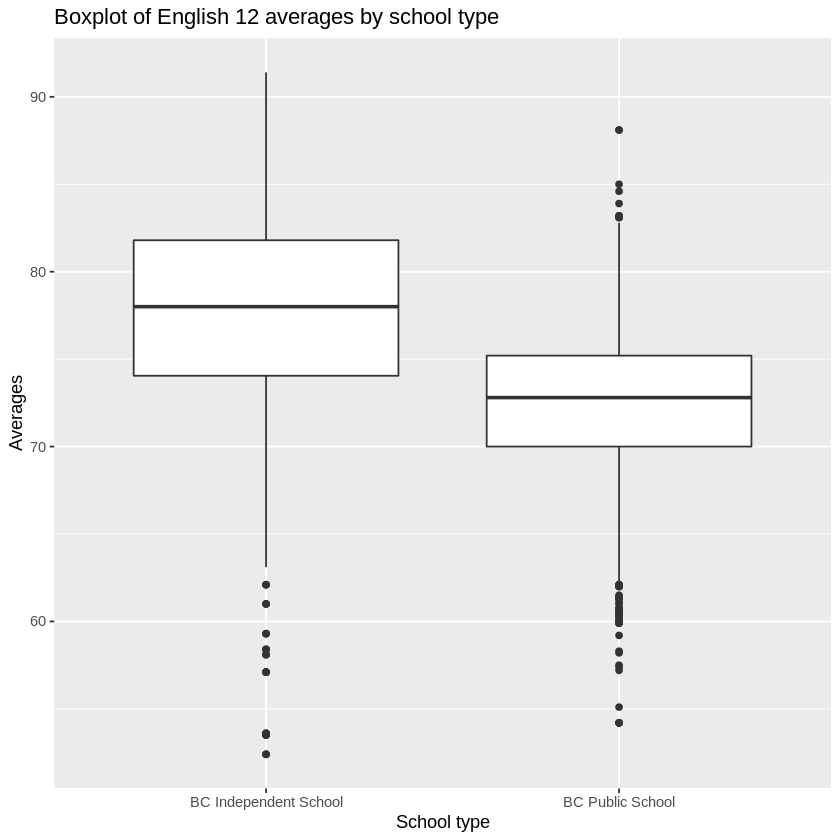

In [6]:
exam_english <- exam_select %>%
    filter(EXAM_SUBJECT == "ENGLISH 12")

english_boxplot <- exam_english %>%
    ggplot() +
    geom_boxplot(aes(x = PUBLIC_OR_INDEPENDENT, y = AVERAGE_PERCENT)) +
    ggtitle("Boxplot of English 12 averages by school type") + 
    xlab("School type") + 
    ylab("Averages") 
english_boxplot



In [7]:
set.seed(122)
exam_sample_public <- exam_english %>% 
    filter(PUBLIC_OR_INDEPENDENT == "BC Public School") %>% 
    rep_sample_n(size = 20) 

exam_sample_independent <- exam_english %>%
    filter(PUBLIC_OR_INDEPENDENT == "BC Independent School") %>% 
    rep_sample_n(size = 20) 

exam_sample <- rbind(exam_sample_public, exam_sample_independent) %>% 
    ungroup() %>% 
    select(-replicate, -EXAM_SUBJECT, -MARK_TYPE)

head(exam_sample)

PUBLIC_OR_INDEPENDENT,AVERAGE_PERCENT
<chr>,<dbl>
BC Public School,69.6
BC Public School,68.4
BC Public School,69.1
BC Public School,77.7
BC Public School,72.5
BC Public School,72.3


In [8]:
obs_diff_in_mean <-   exam_sample  %>% 
    specify(formula = AVERAGE_PERCENT ~ PUBLIC_OR_INDEPENDENT) %>%
    calculate(stat = "diff in means", order = c("BC Independent School", "BC Public School"))
obs_diff_in_mean 

stat
<dbl>
6.09


In [9]:
null_distribution <- exam_sample %>% 
  specify(formula = AVERAGE_PERCENT ~ PUBLIC_OR_INDEPENDENT) %>% 
  hypothesize(null = "independence") %>% 
  generate(reps = 1000, type = "permute") %>% 
  calculate(stat = "diff in means", order = c("BC Independent School", "BC Public School"))
head(null_distribution)

replicate,stat
<int>,<dbl>
1,3.02
2,1.50
3,1.09
4,1.07
5,-0.32
6,-2.59


Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


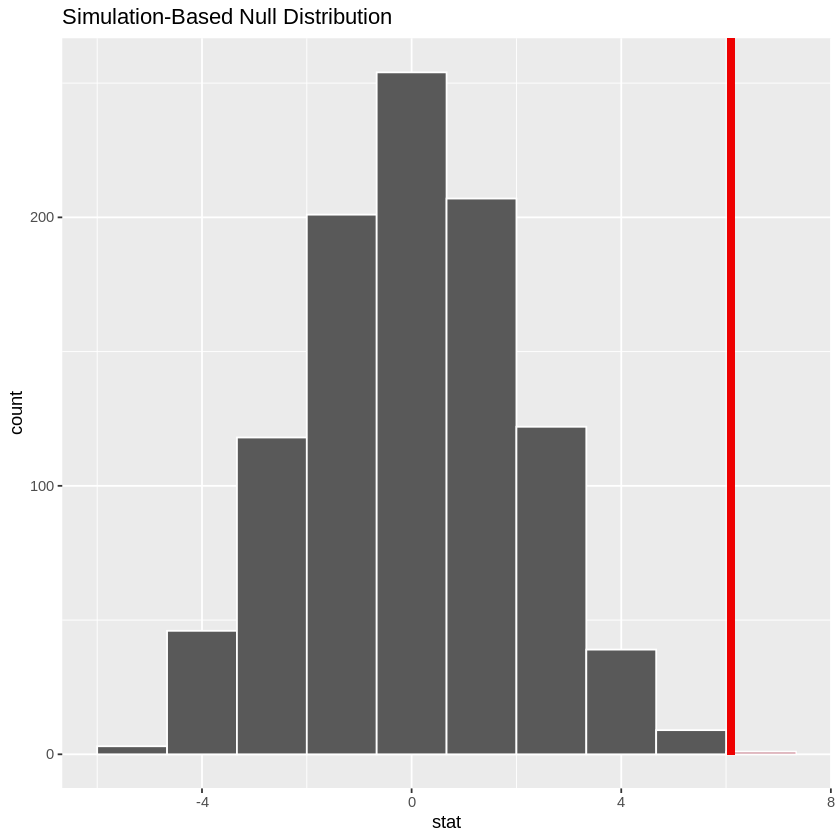

In [10]:
visualize(null_distribution, bins = 10) + 
  shade_p_value(obs_stat = obs_diff_in_mean, direction = "right")

null_distribution %>% 
  get_p_value(obs_stat = obs_diff_in_mean, direction = "right")

At a significance level of 0.05, we reject the null hypthothesis.